In [81]:
library(GenomicRanges)
library(Seurat)
library(Signac)
library(ggplot2)
library(dplyr)
library(ChIPpeakAnno)
library(VennDiagram)
library(stringr)
library(magrittr)


Attaching package: 'magrittr'


The following object is masked from 'package:GenomicRanges':

    subtract




In [2]:
# RefSeq genes are output of Annotation() function from Seurat
ref.gr=readRDS("/g/data/zk16/arthuss/superenhancer/RefSeq_mm10.rds")
# get TSS
tss.gr=ref.gr
# end of the + strand genes must be equalized to start pos
end(tss.gr[strand(tss.gr)=="+",])  =start(tss.gr[strand(tss.gr)=="+",])
# startof the - strand genes must be equalized to end pos
start(tss.gr[strand(tss.gr)=="-",])=end(tss.gr[strand(tss.gr)=="-",])
# remove duplicated TSSes ie alternative transcripts
# this keeps the first instance and removes duplicates
tss.gr=tss.gr[!duplicated(tss.gr),]
print("Imported TSS")


[1] "Imported TSS"


In [23]:
individuals = c('MAE2_1_F','MAE4_3_F', 'MAS1_4_F','MAS3_2_F', 'YE2_1_F','YE4_3_F', 'YS1_4_F','YS3_2_F', 'MAE2_1_M','MAE4_3_M', 'MAS1_4_M','MAS3_2_M', 'YE2_1_M','YE4_3_M', 'YS1_4_M','YS3_2_M')

cells = c('M1','M2','MSC','M_ex','Dendritic','NK','Cardiomyocyte','Coronary_EC','Endocardial_EC','Lymphatic_EC','Fibroblast','Mesothelial','B_cell','T_cell','Pericyte','Smooth_muscle','Cardiac_Neuronal')

ncells_corr = data.frame(cell_individual = character(), cell = character(), individual = character(), ncells = numeric(), nSEs = numeric())
for (cell in cells) {
    for (individual in individuals) {
        if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/SecondRun/", "SE_candidates_", cell, "_", individual, "_stitchingWindow_12500_readCutoff_10.rds", sep = ""))) {
            SEs = readRDS(paste("/g/data/zk16/arthuss/superenhancer/SecondRun/", "SE_candidates_", cell, "_", individual, "_stitchingWindow_12500_readCutoff_10.rds", sep = ""))
            SEs = SEs[!SEs %in% subsetByOverlaps(SEs, tss.gr)]
            if (cell == "Cardiomyocyte") {
                reads = readRDS("/g/data/zk16/jack/HeartSCRNA-Jun22/analysis/2023-10-11.AllMacs/combined_only_Cardiomyoctye.rds")
                } else {
                reads = readRDS(paste("/g/data/zk16/jack/HeartSCRNA-Jun22/analysis/2023-10-11.AllMacs/combined_only_", cell, ".rds", sep = ""))
                }
            readcounts = subset(x = reads, subset = mouseID == individual)@assays$peaks@counts
            ncells = as.numeric(ncol(readcounts))
            nSEs = as.numeric(length(SEs))
            ncells_corr = rbind(ncells_corr, cbind(paste(cell, individual, sep = "_"), cell, individual, ncells, nSEs))
            } else {
            next
            }
        }
    }
ncells_corr


In [25]:
# This should be in the main script
reps = list(c('MAE2_1','MAE4_3'),c('MAS1_4','MAS3_2'),c('YE2_1','YE4_3'),c('YS1_4','YS3_2'))
cells = c('M1','M2','MSC','M_ex','Dendritic','NK','Cardiomyocyte','Coronary_EC','Endocardial_EC','Lymphatic_EC','Fibroblast','Mesothelial','B_cell','T_cell','Pericyte','Smooth_muscle','Cardiac_Neuronal') #Cardiomyoctye misspelt in directory with ATAC data. 
groups = (c(cells[1], c(unlist(reps[1]))))
for (cell in cells) {
    for (rep in reps) {
        group = c(cell, c(unlist(rep)))
        groups = rbind(groups, group)
        }
    }
groups = groups[2:nrow(groups), ]

for (group in c(1:nrow(groups))) {
    if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 2], "_F_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))) {
        SEs = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 2], "_F_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        SEs = SEs[!SEs %in% subsetByOverlaps(SEs, tss.gr)]
        saveRDS(SEs, paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 2], "_F_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        }
    
    if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 3], "_F_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))) {
        SEs = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 3], "_F_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        SEs = SEs[!SEs %in% subsetByOverlaps(SEs, tss.gr)]
        saveRDS(SEs, paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 3], "_F_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        }

    if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 2], "_M_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))) {
        SEs = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 2], "_M_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        SEs = SEs[!SEs %in% subsetByOverlaps(SEs, tss.gr)]
        saveRDS(SEs, paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 2], "_M_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        }
    
    if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 3], "_M_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))) {
        SEs = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 3], "_M_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        SEs = SEs[!SEs %in% subsetByOverlaps(SEs, tss.gr)]
        saveRDS(SEs, paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 3], "_M_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        }
    }


In [24]:
# This should be in the main script
reps = list(c('MAE2_1','MAE4_3'),c('MAS1_4','MAS3_2'),c('YE2_1','YE4_3'),c('YS1_4','YS3_2'))
cells = c('M1','M2','MSC','M_ex','Dendritic','NK','Cardiomyocyte','Coronary_EC','Endocardial_EC','Lymphatic_EC','Fibroblast','Mesothelial','B_cell','T_cell','Pericyte','Smooth_muscle','Cardiac_Neuronal') #Cardiomyoctye misspelt in directory with ATAC data. 
groups = (c(cells[1], c(unlist(reps[1]))))
for (cell in cells) {
    for (rep in reps) {
        group = c(cell, c(unlist(rep)))
        groups = rbind(groups, group)
        }
    }
groups = groups[2:nrow(groups), ]

for (group in c(1:nrow(groups))) {
    if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups[group, 1], "_", groups[group, 2], "_F_", groups[group, 3], "_F_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))) {
        SEs = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups[group, 1], "_", groups[group, 2], "_F_", groups[group, 3], "_F_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        SEs = SEs[!SEs %in% subsetByOverlaps(SEs, tss.gr)]
        saveRDS(SEs, paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups[group, 1], "_", groups[group, 2], "_F_", groups[group, 3], "_F_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        }
    
    if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups[group, 1], "_", groups[group, 2], "_M_", groups[group, 3], "_M_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))) {
        SEs = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups[group, 1], "_", groups[group, 2], "_M_", groups[group, 3], "_M_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        SEs = SEs[!SEs %in% subsetByOverlaps(SEs, tss.gr)]
        saveRDS(SEs, paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups[group, 1], "_", groups[group, 2], "_M_", groups[group, 3], "_M_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        }
    }


Saving 6.67 x 6.67 in image


cell_individual,cell,individual,ncells,nSEs,sex
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
M1_MAE2_1_F,M1,MAE2_1_F,79,290,F
M1_MAE4_3_F,M1,MAE4_3_F,188,290,F
M1_MAS1_4_F,M1,MAS1_4_F,209,280,F
M1_MAS3_2_F,M1,MAS3_2_F,127,268,F
M1_YE2_1_F,M1,YE2_1_F,83,188,F
M1_YE4_3_F,M1,YE4_3_F,124,237,F
M1_YS1_4_F,M1,YS1_4_F,103,162,F
M1_YS3_2_F,M1,YS3_2_F,65,169,F
M1_MAE2_1_M,M1,MAE2_1_M,73,205,M


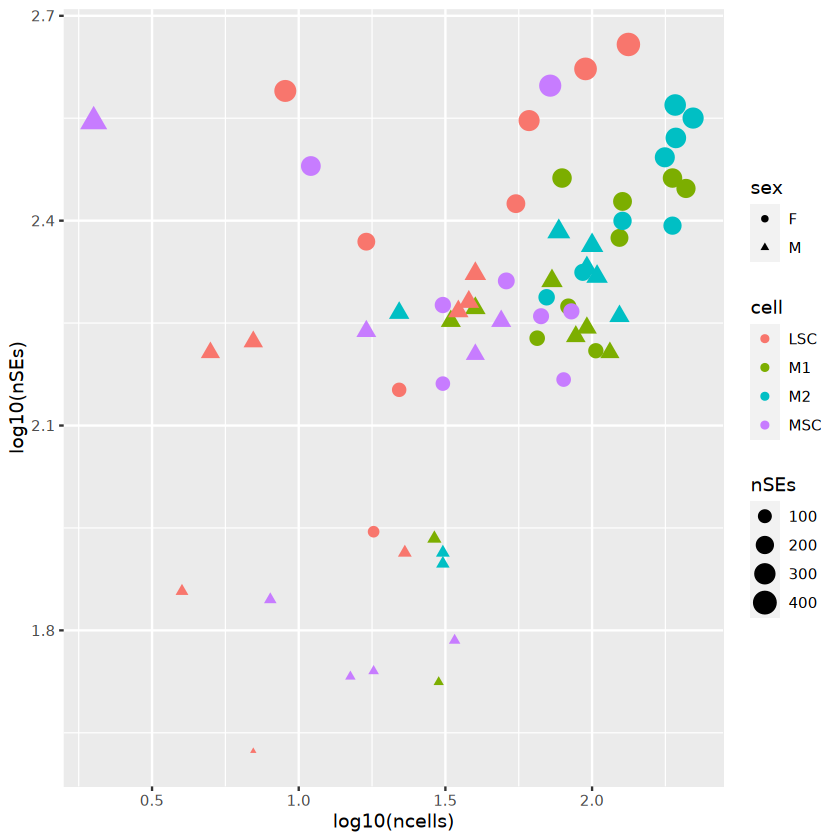

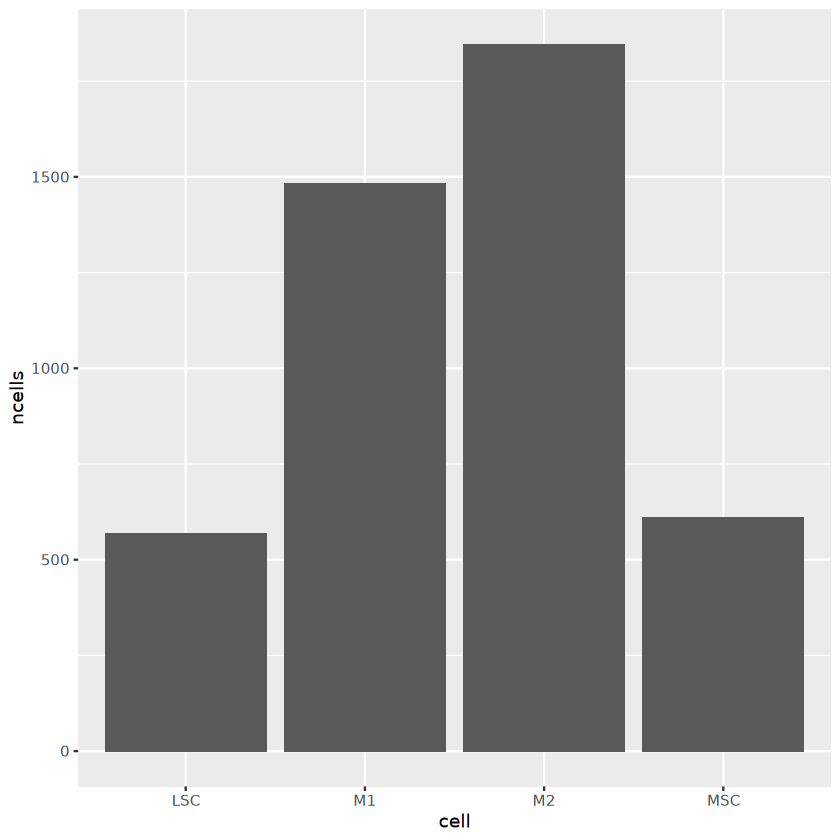

In [83]:
ncells_corr = readRDS("/g/data/zk16/arthuss/superenhancer/CorrelationNCellsNSEsFirstRun.rds")

sex = c()
for (i in !is.na(str_extract(ncells_corr$individual, "_F"))) {
    if (i) {
        sex = append(sex, "F")
        } else {
        sex = append(sex, "M")
        }
    }
ncells_corr$sex = sex
# ncells_corr

ncells_corr_plot = ncells_corr[ncells_corr$cell == "M1" | ncells_corr$cell == "M2" | ncells_corr$cell == "LSC" | ncells_corr$cell == "MSC", ]
ggplot(ncells_corr_plot, aes(x = log10(ncells), y = log10(nSEs))) + geom_point(aes(size = nSEs, shape = sex, colour = cell))
ggsave("HighSEs.png")

ncells_corr_plot %>% group_by(sex)
ggplot(ncells_corr_plot, aes(x = cell, y = ncells)) + geom_bar(stat = "identity")

In [30]:
overlaps = data.frame(cell = character(), treatment = character(), M_overlaps = numeric(), M_rep1_only = numeric(), M_rep2_only = numeric(), F_overlaps = numeric(), F_rep1_only = numeric(), F_rep2_only = numeric())

for (group in c(1:nrow(groups))) {
    if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 2], "_F_", "stitchingWindow_12500_readCutoff_10.rds", sep = "")) & file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 3], "_F_", "stitchingWindow_12500_readCutoff_10.rds", sep = "")) & file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 2], "_M_", "stitchingWindow_12500_readCutoff_10.rds", sep = "")) & file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 3], "_M_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))) {
        SE_1_F = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 2], "_F_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        SE_2_F = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 3], "_F_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        SE_1_M = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 2], "_M_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
        SE_2_M = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/", "SE_candidates_", groups[group, 1], "_", groups[group, 3], "_M_", "stitchingWindow_12500_readCutoff_10.rds", sep = ""))
    venn_F = makeVennDiagram(list(SE_1_F, SE_2_F), method = "permutation", plot = FALSE)$vennCounts
    venn_M = makeVennDiagram(list(SE_1_M, SE_2_M), method = "permutation", plot = FALSE)$vennCounts
    treatment_index = group %% 4
    if (treatment_index == 0) {
        treatment_index = 4
        }
    overlaps = rbind(overlaps, c(groups[group, 1], paste(groups[group, 2], "_", groups[group, 3], sep = ""), as.numeric(venn_M[4, 3]), as.numeric(venn_M[3, 3]), as.numeric(venn_M[2, 3]), as.numeric(venn_F[4, 3]), as.numeric(venn_F[3, 3]), as.numeric(venn_F[2, 3])))
        }
    }

Warning message in makeVennDiagram(list(SE_1_F, SE_2_F), method = "permutation", :
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(SE_1_F, SE_2_F), method = "permutation", :
"TxDb is missing. Please try ?peakPermTest later."
Warning message in makeVennDiagram(list(SE_1_M, SE_2_M), method = "permutation", :
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(SE_1_M, SE_2_M), method = "permutation", :
"TxDb is missing. Please try ?peakPermTest later."
Warning message in makeVennDiagram(list(SE_1_F, SE_2_F), method = "permutation", :
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(SE_1_F, SE_2_F), method = "permutation", :
"TxDb is missing. Please try ?peakPer

X.M1.,X.MAE2_1_MAE4_3.,X.148.,X.57.,X.22.,X.239.,X.51.,X.51..1
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
M1,MAE2_1_MAE4_3,148,57,22,239,51,51
M1,MAS1_4_MAS3_2,137,38,50,234,46,34
M1,YE2_1_YE4_3,39,14,47,173,15,64
M1,YS1_4_YS3_2,130,31,49,134,28,35
M2,MAE2_1_MAE4_3,173,58,35,307,25,64
M2,MAS1_4_MAS3_2,179,35,63,298,13,57
M2,YE2_1_YE4_3,48,31,34,207,44,40
M2,YS1_4_YS3_2,132,50,52,161,50,33
MSC,MAE2_1_MAE4_3,102,58,249,225,171,77


In [86]:
for (cell in unique(as.character(groups[, 1]))) {
    overlap_cell = overlaps[overlaps[, 1] == cell, ]
    print(c(cell, mean(as.numeric(overlap_cell[, 3])), mean(as.numeric(overlap_cell[, 6]))))
    # print(c(cell, mean(as.numeric(overlap_cell[, 3])), mean(mean(as.numeric(overlap_cell[, 4]), as.numeric(overlap_cell[, 5]))), mean(as.numeric(overlap_cell[, 6])), mean(mean(as.numeric(overlap_cell[, 7]), as.numeric(overlap_cell[, 8])))))
    }


ERROR: Error in h(simpleError(msg, call)): error in evaluating the argument 'x' in selecting a method for function 'mean': 'trim' must be numeric of length one


In [27]:
SE_1_F

[1] "/g/data/zk16/arthuss/superenhancer/FirstRun/SE_candidates_M1_MAE2_1_F_stitchingWindow_12500_readCutoff_10.rds"

In [17]:
# test = readRDS('/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/M1_MAE2_1_F_MAE4_3_F_stitchingWindow_12500_readCutoff_10_CombinedSuperEnahncerCandidates.gr.rds')
test = readRDS('/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/M1_MAE2_1_F_MAE4_3_F_stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds')


In [57]:
colnames(ncells_corr) = c("cell_individual", "cell", "individual", "ncells", "nSEs" )
ncells_corr$ncells = as.numeric(ncells_corr$ncells)
ncells_corr$nSEs = as.numeric(ncells_corr$nSEs)

In [27]:
ncells_corr = readRDS("/g/data/zk16/arthuss/superenhancer/CorrelationNCellsNSEsFirstRun.rds")
plot = ggplot(ncells_corr, aes(x = ncells, y = nSEs, colour = cell, size = ncells)) + geom_point()
ggsave("ncells_SE_corr_plot_FirstRun.png")

Saving 6.67 x 6.67 in image


In [38]:
# saveRDS(ncells_corr, "/g/data/zk16/arthuss/superenhancer/CorrelationNCellsNSEsFirstRun.rds")

In [33]:
test = readRDS("/g/data/zk16/arthuss/superenhancer/SecondRun/Cardiac_Neuronal_YS3_2_M_stitchingWindow_12500_readCutoff_10_merged.gr.rds")
test

GRanges object with 30 ranges and 9 metadata columns:
       seqnames              ranges strand |  ReadSums   ReadSDs
          <Rle>           <IRanges>  <Rle> | <numeric> <logical>
   [1]     chr1   59449403-59449797      * |         0      <NA>
   [2]     chr1   86434164-86434812      * |         0      <NA>
   [3]     chr2   27572949-27573326      * |         0      <NA>
   [4]     chr3   55096342-55096591      * |         0      <NA>
   [5]     chr3 145923949-145924353      * |         0      <NA>
   ...      ...                 ...    ... .       ...       ...
  [26]    chr15   88850570-88850769      * |         0      <NA>
  [27]    chr16   45328165-45328682      * |         0      <NA>
  [28]    chr17   39845964-39846221      * |         0      <NA>
  [29]    chr17   84058677-84058915      * |         0      <NA>
  [30]    chr18   36801613-36801974      * |         2      <NA>
       MappingReadNumbers  ConstituentPeakCoords NumberOfConstituentPeaks
              <character>  

In [3]:
reps = list(c('MAE2_1','MAE4_3'),c('MAS1_4','MAS3_2'),c('YE2_1','YE4_3'),c('YS1_4','YS3_2'))

cells = c('M1','M2','MSC','LSC','Dendritic','NK','Cardiomyocyte','Coronary_EC','Endocardial_EC','Lymphatic_EC','Fibroblast','Mesothelial','B_cell','T_cell','Pericyte','Smooth_Muscle','Cardiac_Neuronal') #Cardiomyoctye misspelt in directory with ATAC data. 

fails = c()

treatments = c("AE", "AS", "YE", "YS")
sexes = c("F", "M")

overlaps = data.frame(cell = character(), treatment = character(), M = character(), F = character(), MF = character())
overlaps

groups = (c(cells[1], c(unlist(reps[1]))))
for (cell in cells) {
    for (rep in reps) {
        group = c(cell, c(unlist(rep)))
        groups = rbind(groups, group)
        }
    }
groups = groups[2:nrow(groups), ]
groups

cell,treatment,M,F,MF
<chr>,<chr>,<chr>,<chr>,<chr>


group,M1,MAE2_1,MAE4_3
group,M1,MAS1_4,MAS3_2
group,M1,YE2_1,YE4_3
group,M1,YS1_4,YS3_2
group,M2,MAE2_1,MAE4_3
group,M2,MAS1_4,MAS3_2
group,M2,YE2_1,YE4_3
group,M2,YS1_4,YS3_2
group,MSC,MAE2_1,MAE4_3
group,MSC,MAS1_4,MAS3_2
group,MSC,YE2_1,YE4_3


In [54]:
5 %% 4

[1] 0

In [8]:
for (i in c(1:nrow(groups))) {
    print(groups[i, ])
    if (i == 51) {
        print("Skipping")
        next
        }
    if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups[i, 1], "_", groups[i, 2], "_M_", groups[i, 3],"_M_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = "")) & file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups[i, 1], "_", groups[i, 2], "_F_", groups[i, 3], "_F_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))){
        test1 = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups[i, 1], "_", groups[i, 2], "_M_", groups[i, 3],"_M_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        test2 = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups[i, 1], "_", groups[i, 2], "_F_", groups[i, 3], "_F_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        venn = makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE)$vennCounts
        treatment_index = i %% 4
        if (treatment_index == 0) {
            treatment_index = 4
            }
        overlaps = rbind(overlaps, c(groups[i, 1], treatments[treatment_index], as.numeric(venn[2, 3]), as.numeric(venn[3, 3]), as.numeric(venn[4, 3])))
        } else {
        print("No file")
        next
    }
    }
        
# Fix this later

# test1 = readRDS("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/M1_MAE2_1_F_MAE4_3_F_stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds")
# test2 = readRDS("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/M1_MAE2_1_M_MAE4_3_M_stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds")
# # findOverlaps(test1, test2)
# makeVennDiagram(list(test1, test2), NameOfPeaks = c("AEF", "AEM"), method = "permutation", plot = FALSE)$vennCounts
# as.numeric(makeVennDiagram(list(test1, test2), NameOfPeaks = c("AEF", "AEM"), method = "permutation", plot = FALSE)$vennCounts[2, 3])
# # findOverlapsOfPeaks(test1, test2)$venn_cnt

[1] "M1"     "MAE2_1" "MAE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "M1"     "MAS1_4" "MAS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "M1"    "YE2_1" "YE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "M1"    "YS1_4" "YS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "M2"     "MAE2_1" "MAE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "M2"     "MAS1_4" "MAS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "M2"    "YE2_1" "YE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "M2"    "YS1_4" "YS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "MSC"    "MAE2_1" "MAE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "MSC"    "MAS1_4" "MAS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "MSC"   "YE2_1" "YE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "MSC"   "YS1_4" "YS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "LSC"    "MAE2_1" "MAE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "LSC"    "MAS1_4" "MAS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "LSC"   "YE2_1" "YE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "LSC"   "YS1_4" "YS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Dendritic" "MAE2_1"    "MAE4_3"   


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Dendritic" "MAS1_4"    "MAS3_2"   
[1] "No file"
[1] "Dendritic" "YE2_1"     "YE4_3"    
[1] "No file"
[1] "Dendritic" "YS1_4"     "YS3_2"    
[1] "No file"
[1] "NK"     "MAE2_1" "MAE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "NK"     "MAS1_4" "MAS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "NK"    "YE2_1" "YE4_3"
[1] "No file"
[1] "NK"    "YS1_4" "YS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Cardiomyocyte" "MAE2_1"        "MAE4_3"       


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Cardiomyocyte" "MAS1_4"        "MAS3_2"       


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Cardiomyocyte" "YE2_1"         "YE4_3"        


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Cardiomyocyte" "YS1_4"         "YS3_2"        


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Coronary_EC" "MAE2_1"      "MAE4_3"     


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Coronary_EC" "MAS1_4"      "MAS3_2"     


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Coronary_EC" "YE2_1"       "YE4_3"      


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Coronary_EC" "YS1_4"       "YS3_2"      


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Endocardial_EC" "MAE2_1"         "MAE4_3"        


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Endocardial_EC" "MAS1_4"         "MAS3_2"        


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Endocardial_EC" "YE2_1"          "YE4_3"         


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Endocardial_EC" "YS1_4"          "YS3_2"         


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Lymphatic_EC" "MAE2_1"       "MAE4_3"      


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Lymphatic_EC" "MAS1_4"       "MAS3_2"      


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Lymphatic_EC" "YE2_1"        "YE4_3"       


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Lymphatic_EC" "YS1_4"        "YS3_2"       


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Fibroblast" "MAE2_1"     "MAE4_3"    


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Fibroblast" "MAS1_4"     "MAS3_2"    


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Fibroblast" "YE2_1"      "YE4_3"     


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Fibroblast" "YS1_4"      "YS3_2"     


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Mesothelial" "MAE2_1"      "MAE4_3"     


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Mesothelial" "MAS1_4"      "MAS3_2"     


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Mesothelial" "YE2_1"       "YE4_3"      


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Mesothelial" "YS1_4"       "YS3_2"      


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "B_cell" "MAE2_1" "MAE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "B_cell" "MAS1_4" "MAS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "B_cell" "YE2_1"  "YE4_3" 
[1] "Skipping"
[1] "B_cell" "YS1_4"  "YS3_2" 


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "T_cell" "MAE2_1" "MAE4_3"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "T_cell" "MAS1_4" "MAS3_2"


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "T_cell" "YE2_1"  "YE4_3" 


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "T_cell" "YS1_4"  "YS3_2" 
[1] "No file"
[1] "Pericyte" "MAE2_1"   "MAE4_3"  


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Pericyte" "MAS1_4"   "MAS3_2"  


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Pericyte" "YE2_1"    "YE4_3"   


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Pericyte" "YS1_4"    "YS3_2"   


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Smooth_Muscle" "MAE2_1"        "MAE4_3"       
[1] "No file"
[1] "Smooth_Muscle" "MAS1_4"        "MAS3_2"       
[1] "No file"
[1] "Smooth_Muscle" "YE2_1"         "YE4_3"        
[1] "No file"
[1] "Smooth_Muscle" "YS1_4"         "YS3_2"        
[1] "No file"
[1] "Cardiac_Neuronal" "MAE2_1"           "MAE4_3"          
[1] "No file"
[1] "Cardiac_Neuronal" "MAS1_4"           "MAS3_2"          


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Cardiac_Neuronal" "YE2_1"            "YE4_3"           


Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."
Warning message in makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE):
"TxDb is missing. Please try ?peakPermTest later."


[1] "Cardiac_Neuronal" "YS1_4"            "YS3_2"           
[1] "No file"


In [9]:
colnames(overlaps) = c("cell", "treatment", "M", "F", "MF")
overlaps

cell,treatment,M,F,MF
<chr>,<chr>,<chr>,<chr>,<chr>
M1,AE,99,8,140
M1,AS,103,6,131
M1,YE,139,4,34
M1,YS,23,19,111
M2,AE,145,10,162
M2,AS,129,9,169
M2,YE,166,6,41
M2,YS,52,23,109
MSC,AE,144,21,81


In [54]:
reps_sexmerge = list(c('MAE2_1','MAE4_3'),c('MAS1_4','MAS3_2'),c('YE2_1','YE4_3'),c('YS1_4','YS3_2'))

cells_sexmerge = c('M1','M2','MSC','LSC','Cardiomyocyte','Fibroblast')

groups_sexmerge = (c(cells_sexmerge[1], c(unlist(reps_sexmerge[1]))))
for (cell in cells_sexmerge) {
    for (rep in reps_sexmerge) {
        group = c(cell, c(unlist(rep)))
        groups_sexmerge = rbind(groups_sexmerge, group)
        }
    }
groups_sexmerge = groups_sexmerge[2:nrow(groups_sexmerge), ]

for (i in c(1:nrow(groups_sexmerge))) {
    bed = data.frame(seq = character(), start = numeric(), end = numeric(), name = character())
    print(groups_sexmerge[i, ])
    if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_M_", groups_sexmerge[i, 3],"_M_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = "")) & file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_F_", groups_sexmerge[i, 3], "_F_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))){
        test1 = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_M_", groups_sexmerge[i, 3],"_M_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        test2 = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_F_", groups_sexmerge[i, 3], "_F_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        # intersection = test1[as.data.frame(findOverlaps(test1, test2))[, 1], ]
        union = reduce(makeGRangesFromDataFrame(rbind(as.data.frame(reduce(test1)), as.data.frame(reduce(test2)))))
        for (region in c(1:length(union))) {
            bed = rbind(bed, cbind(as.character(seqnames(union[region, ])), as.numeric(start(union[region, ])), as.numeric(end(union[region, ])), as.character(region)))
            write.table(bed, file=paste('/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_union_BEDs/', groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_", groups_sexmerge[i, 3], ".bed", sep = ""), quote=FALSE, sep='\t', col.names = FALSE, row.names = FALSE)
            }
        }
    }


[1] "M1"     "MAE2_1" "MAE4_3"
[1] "M1"     "MAS1_4" "MAS3_2"
[1] "M1"    "YE2_1" "YE4_3"
[1] "M1"    "YS1_4" "YS3_2"
[1] "M2"     "MAE2_1" "MAE4_3"
[1] "M2"     "MAS1_4" "MAS3_2"
[1] "M2"    "YE2_1" "YE4_3"
[1] "M2"    "YS1_4" "YS3_2"
[1] "MSC"    "MAE2_1" "MAE4_3"
[1] "MSC"    "MAS1_4" "MAS3_2"
[1] "MSC"   "YE2_1" "YE4_3"
[1] "MSC"   "YS1_4" "YS3_2"
[1] "LSC"    "MAE2_1" "MAE4_3"
[1] "LSC"    "MAS1_4" "MAS3_2"
[1] "LSC"   "YE2_1" "YE4_3"
[1] "LSC"   "YS1_4" "YS3_2"
[1] "Cardiomyocyte" "MAE2_1"        "MAE4_3"       
[1] "Cardiomyocyte" "MAS1_4"        "MAS3_2"       
[1] "Cardiomyocyte" "YE2_1"         "YE4_3"        
[1] "Cardiomyocyte" "YS1_4"         "YS3_2"        
[1] "Fibroblast" "MAE2_1"     "MAE4_3"    
[1] "Fibroblast" "MAS1_4"     "MAS3_2"    
[1] "Fibroblast" "YE2_1"      "YE4_3"     
[1] "Fibroblast" "YS1_4"      "YS3_2"     


In [13]:
reps_sexmerge = c('MAE2_1_MAE4_3', 'MAS1_4_MAS3_2', 'YE2_1_YE4_3', 'YS1_4_YS3_2')

cells_sexmerge = c('M1','M2','MSC','M_ex','Cardiomyocyte','Fibroblast')

for (i in c(1:length(cells_sexmerge))) {
    cell = cells_sexmerge[i]
    bed1 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_union_BEDs/", cell, "_", reps_sexmerge[1], ".bed", sep = ""))
    bed2 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_union_BEDs/", cell, "_", reps_sexmerge[2], ".bed", sep = ""))
    bed3 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_union_BEDs/", cell, "_", reps_sexmerge[3], ".bed", sep = ""))
    bed4 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_union_BEDs/", cell, "_", reps_sexmerge[4], ".bed", sep = ""))
    # bed = bed1[bed1[, 2] %in% bed2[, 2] & bed1[, 2] %in% bed3[, 2] & bed1[, 2] %in% bed4[, 2], ]
    bed = rbind(rbind(rbind(bed1, bed2), bed3), bed4)
    bed = bed[!duplicated(bed[, 2]), ]
    bed = bed[order(bed[, 1], bed[, 2]), ]
    bed[, 4] = paste(bed[, 1], bed[, 2], bed[, 3], sep = "-")
    write.table(bed, file=paste('/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_union_BEDs/', cell, "_union_all.bed", sep = ""), quote=FALSE, sep='\t', col.names = FALSE, row.names = FALSE)
    }


In [28]:
cells_M_merge = c('M1','M2','MSC','M_ex')

bed1 = read.table(paste('/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_intersection_BEDs/', cells_M_merge[1], "_intersection_all.bed", sep = ""))
bed2 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_intersection_BEDs/", cells_M_merge[2], "_intersection_all.bed", sep = ""))
bed3 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_intersection_BEDs/", cells_M_merge[3], "_intersection_all.bed", sep = ""))
bed4 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_intersection_BEDs/", cells_M_merge[4], "_intersection_all.bed", sep = ""))
bed = rbind(rbind(rbind(bed1, bed2), bed3), bed4)
bed = bed[!duplicated(bed[, 2]), ]
bed = bed[order(bed[, 1], bed[, 2]), ]
bed[, 4] = paste(bed[, 1], bed[, 2], bed[, 3], sep = "-")
write.table(bed, file=paste('/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_intersection_BEDs/', "M_UnionOfIntersections_all.bed", sep = ""), quote=FALSE, sep='\t', col.names = FALSE, row.names = FALSE)


In [20]:
reps_sexmerge = c('MAE2_1_MAE4_3', 'MAS1_4_MAS3_2', 'YE2_1_YE4_3', 'YS1_4_YS3_2')

cells_sexmerge = c('M1','M2','MSC','M_ex','Cardiomyocyte','Fibroblast')

for (i in c(1:length(cells_sexmerge))) {
    cell = cells_sexmerge[i]
    bed1 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_intersection_BEDs/", cell, "_", reps_sexmerge[1], ".bed", sep = ""))
    bed2 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_intersection_BEDs/", cell, "_", reps_sexmerge[2], ".bed", sep = ""))
    bed3 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_intersection_BEDs/", cell, "_", reps_sexmerge[3], ".bed", sep = ""))
    bed4 = read.table(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_intersection_BEDs/", cell, "_", reps_sexmerge[4], ".bed", sep = ""))
    venn.diagram(x = list(bed1[, 2], bed2[, 2], bed3[, 2], bed4[, 2]), category.names = c("AE", "AS", "YE", "YS"), filename = paste(cells_sexmerge[i], "_intersection.png", sep = ""), output = TRUE)
    }


In [10]:
duplicated(bed[, 2])

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

GRanges object with 821 ranges and 0 metadata columns:
        seqnames              ranges strand
           <Rle>           <IRanges>  <Rle>
    [1]     chr1   14772608-14801447      *
    [2]     chr1   33672572-33697423      *
    [3]     chr1   39063994-39107421      *
    [4]     chr1   39731488-39773173      *
    [5]     chr1   45289763-45309379      *
    ...      ...                 ...    ...
  [817]    chr19   56156425-56204286      *
  [818]     chrX   68494571-68508293      *
  [819]     chrX   73460943-73483005      *
  [820]     chrX   99497304-99542182      *
  [821]     chrX 140479039-140538925      *
  -------
  seqinfo: 21 sequences from an unspecified genome; no seqlengths

Missing totalTest! totalTest is required for HyperG test. 
If totalTest is missing, pvalue will be calculated by estimating 
the total binding sites of encoding region of human.
totalTest = humanGenomeSize * (2%(codingDNA) + 
             1%(regulationRegion)) / ( 2 * averagePeakWidth )
          = 3.3e+9 * 0.03 / ( 2 * averagePeakWidth)
          = 5e+7 /averagePeakWidth

Warning message in makeVennDiagram(list(test1, test2)):
"Missing required character vector NameOfPeaks. 
            NameOfPeaks will be extract from the names of input Peaks."


$p.value
     peaks1 peaks2 pval
[1,]      1      1    0

$vennCounts
     peaks1 peaks2 Counts
[1,]      0      0      0
[2,]      0      1     74
[3,]      1      0     22
[4,]      1      1    725
attr(,"class")
[1] "VennCounts"


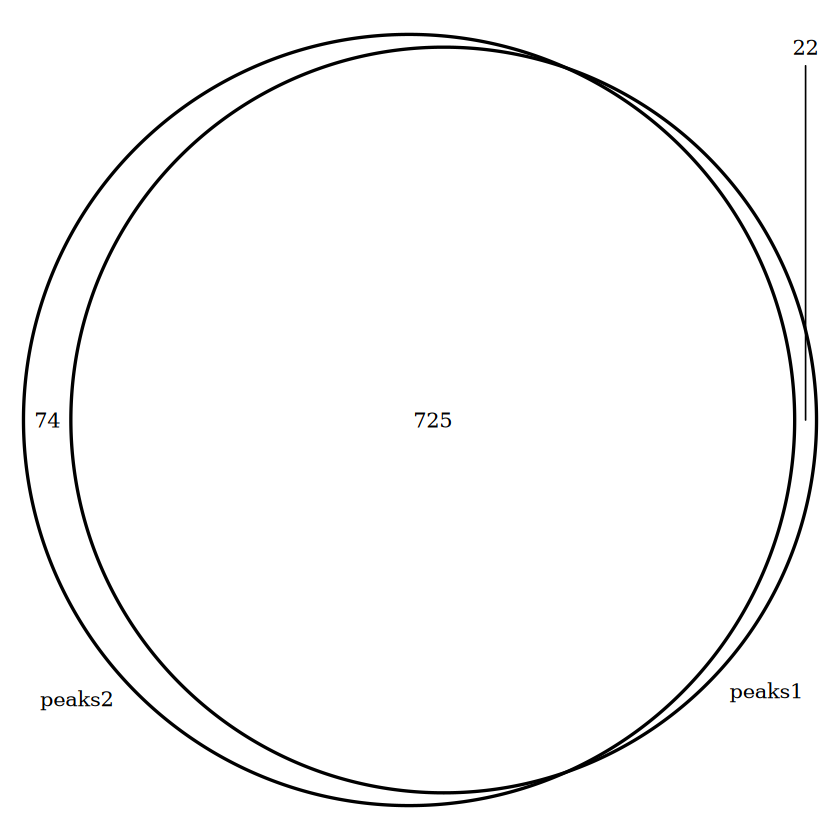

In [52]:
reduce(makeGRangesFromDataFrame(rbind(as.data.frame(reduce(test1)), as.data.frame(reduce(test2)))))

In [36]:
bed

V1,V2,V3,V4
<chr>,<chr>,<chr>,<chr>
chr1,86433981,86442737,1
chr1,86503715,86504636,2
chr1,134060779,134065646,3
chr1,134092649,134099512,4
chr1,177441566,177442319,5
chr2,32495205,32509668,6
chr2,59400817,59402311,7
chr2,122375405,122377692,8
chr2,152177163,152190046,9


In [10]:
ave_overlaps = data.frame(cell = character(), M = character(), F = character(), MF = character())
for (CellType in unique(overlaps$cell)) {
    table = subset(x = overlaps, subset = cell == CellType)
        add = c(CellType, round(mean(as.numeric(table[, 3])), digits = 0), round(mean(as.numeric(table[, 4])), digits = 0), round(mean(as.numeric(table[, 5])), digits = 0))
        ave_overlaps = rbind(ave_overlaps, add)
    }
colnames(ave_overlaps) = c("CellType", "M", "F", "MF")
ave_overlaps

CellType,M,F,MF
<chr>,<chr>,<chr>,<chr>
M1,91,9,104
M2,123,12,120
MSC,101,17,54
LSC,159,23,40
Dendritic,34,1,1
NK,13,3,4
Cardiomyocyte,106,50,789
Coronary_EC,172,29,396
Endocardial_EC,212,34,206


In [40]:
test1 = readRDS("/g/data/zk16/arthuss/superenhancer/FirstRun/MF_union_BEDs/MSC_YS1_4_YS3_2.bed")
test2 = readRDS("/g/data/zk16/arthuss/superenhancer/FirstRun/MF_union_BEDs/MSC_MAE2_1_MAE4_3.bed")
# findOverlaps(test1, test2)
makeVennDiagram(list(test1, test2), NameOfPeaks = c("M1_AEF", "M1_AEM"), method = "permutation", plot = TRUE)$vennCounts
as.numeric(makeVennDiagram(list(test1, test2), NameOfPeaks = c("AEF", "AEM"), method = "permutation", plot = FALSE)$vennCounts[2, 3])
# findOverlapsOfPeaks(test1, test2)$venn_cnt

ERROR: Error in readRDS("/g/data/zk16/arthuss/superenhancer/FirstRun/MF_union_BEDs/MSC_YS1_4_YS3_2.bed"): unknown input format


In [40]:
reps_sexmerge = list(c('MAE2_1','MAE4_3'),c('MAS1_4','MAS3_2'),c('YE2_1','YE4_3'),c('YS1_4','YS3_2'))

cells_sexmerge = c('M1','M2','MSC','M_ex','Fibroblast')

groups_sexmerge = (c(cells_sexmerge[1], c(unlist(reps_sexmerge[1]))))
for (cell in cells_sexmerge) {
    for (rep in reps_sexmerge) {
        group = c(cell, c(unlist(rep)))
        groups_sexmerge = rbind(groups_sexmerge, group)
        }
    }
groups_sexmerge = groups_sexmerge[2:nrow(groups_sexmerge), ]

for (i in c(1:nrow(groups_sexmerge))) {
    if (file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_M_", groups_sexmerge[i, 3],"_M_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = "")) & file.exists(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_F_", groups_sexmerge[i, 3], "_F_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))){
        test1 = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_M_", groups_sexmerge[i, 3],"_M_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        test2 = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_F_", groups_sexmerge[i, 3], "_F_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        intersection = test1[as.data.frame(findOverlaps(test1, test2))[, 1], ]
        mcols(intersection) = cbind(mcols(intersection), mcols(test2[as.data.frame(findOverlaps(test1, test2))[, 2], ]))
        intersection = intersection[!duplicated(intersection), ]
        saveRDS(intersection, paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_", groups_sexmerge[i, 3], ".gr.rds", sep = ""))
        # for (region in c(1:length(union))) {
        #     bed = rbind(bed, cbind(as.character(seqnames(union[region, ])), as.numeric(start(union[region, ])), as.numeric(end(union[region, ])), as.character(region)))
        #     write.table(bed, file=paste('/g/data/zk16/arthuss/superenhancer/FirstRun/GREAT_BEDs/MF_union_BEDs/', groups_sexmerge[i, 1], "_", groups_sexmerge[i, 2], "_", groups_sexmerge[i, 3], ".bed", sep = ""), quote=FALSE, sep='\t', col.names = FALSE, row.names = FALSE)
        #     }
        }
    }


Warning message in makeVennDiagram(list(test1, test2), NameOfPeaks = c("M", "F"), :
"TxDb is missing. Please try ?peakPermTest later."


$p.value
[1] NA

$vennCounts
     M F Counts
[1,] 0 0      0
[2,] 0 1    152
[3,] 1 0     15
[4,] 1 1    288
attr(,"class")
[1] "VennCounts"


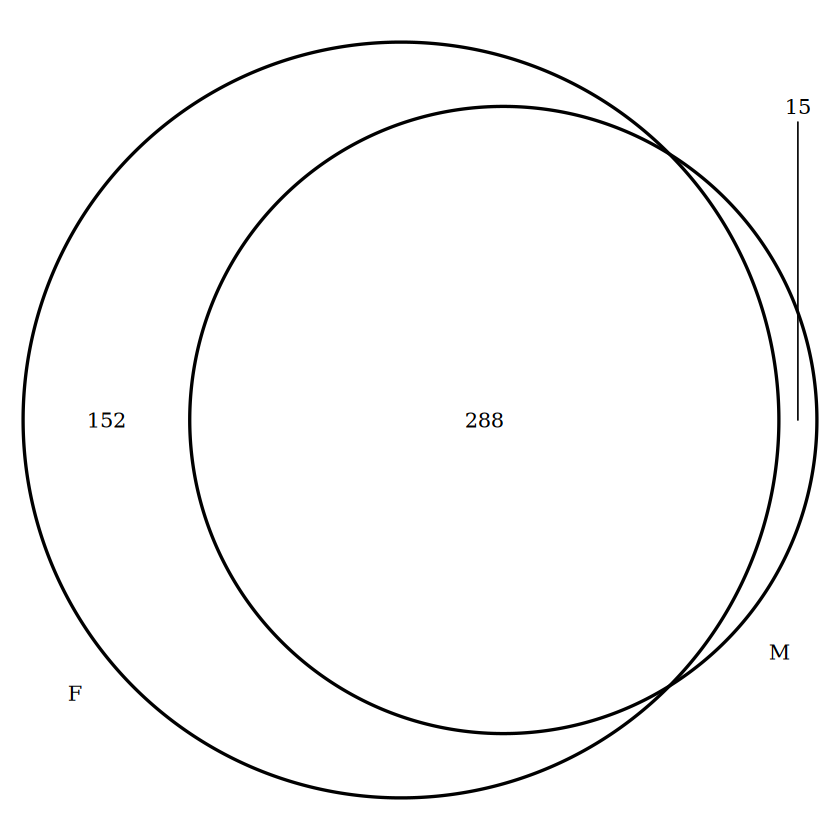

In [72]:
test1 = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", "Pericyte", "_", groups_sexmerge[i, 2], "_M_", groups_sexmerge[i, 3],"_M_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
test2 = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/", "Pericyte", "_", groups_sexmerge[i, 2], "_F_", groups_sexmerge[i, 3], "_F_", "stitchingWindow_12500_readCutoff_10_CombinedSuperenhancerCandidates.gr.rds", sep = ""))
        
makeVennDiagram(list(test1, test2), NameOfPeaks = c("M", "F"), method = "permutation", plot = TRUE)


Warning message in makeVennDiagram(list(AE, AS, YE, YS), NameOfPeaks = c("AE", "AS", :
"TxDb is missing. Please try ?peakPermTest later."
Warning message in makeVennDiagram(list(AE, AS, YE, YS), NameOfPeaks = c("AE", "AS", :
"TxDb is missing. Please try ?peakPermTest later."
Warning message in makeVennDiagram(list(AE, AS, YE, YS), NameOfPeaks = c("AE", "AS", :
"TxDb is missing. Please try ?peakPermTest later."


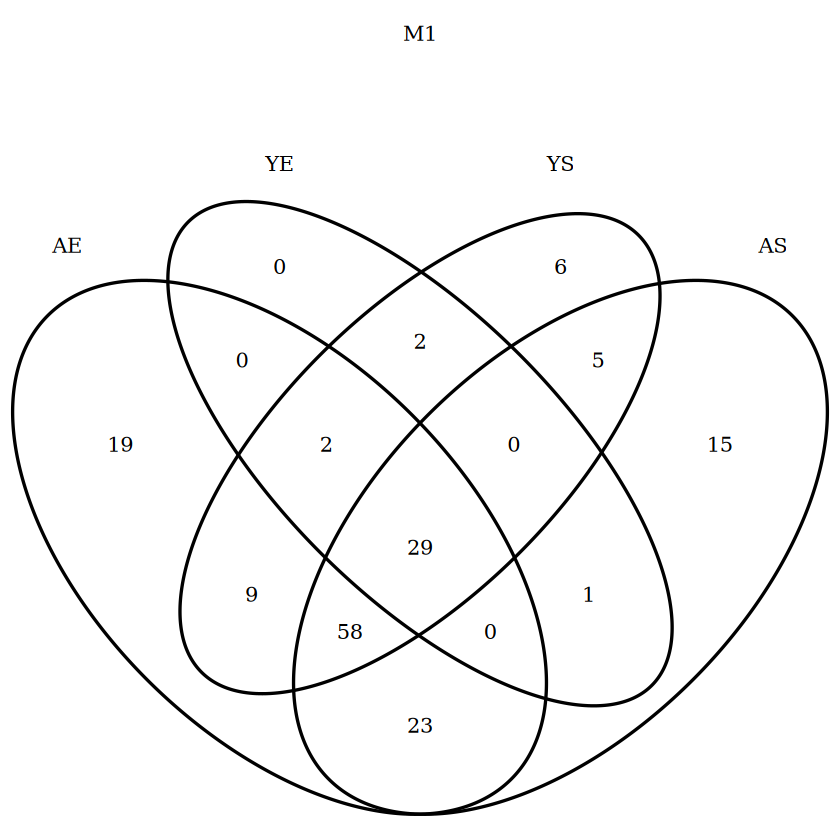

Warning message in makeVennDiagram(list(AE, AS, YE, YS), NameOfPeaks = c("AE", "AS", :
"TxDb is missing. Please try ?peakPermTest later."


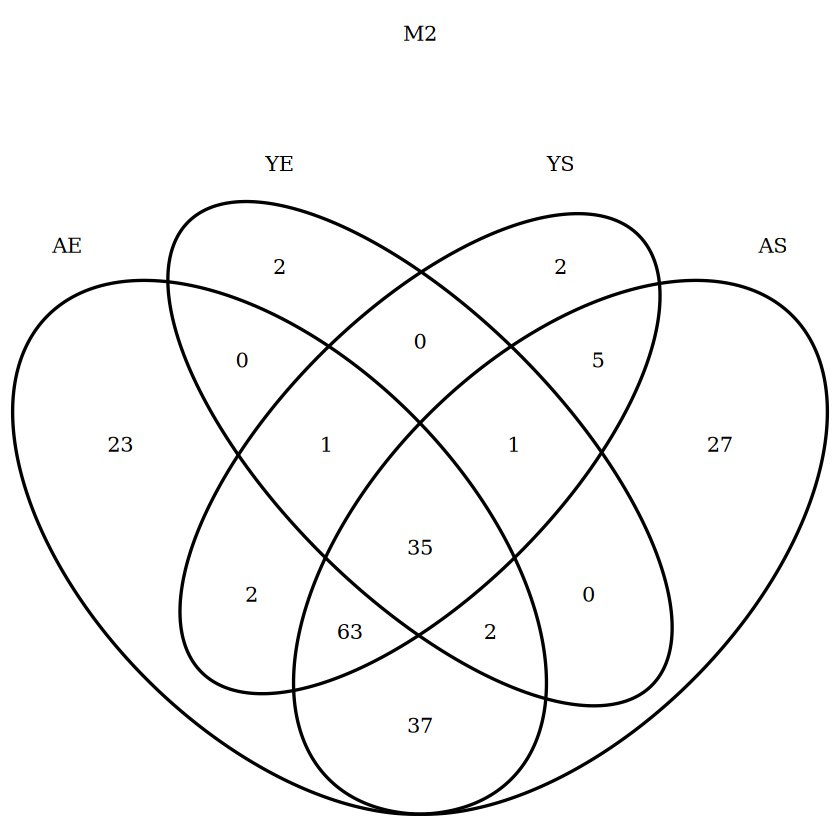

Warning message in makeVennDiagram(list(AE, AS, YE, YS), NameOfPeaks = c("AE", "AS", :
"TxDb is missing. Please try ?peakPermTest later."


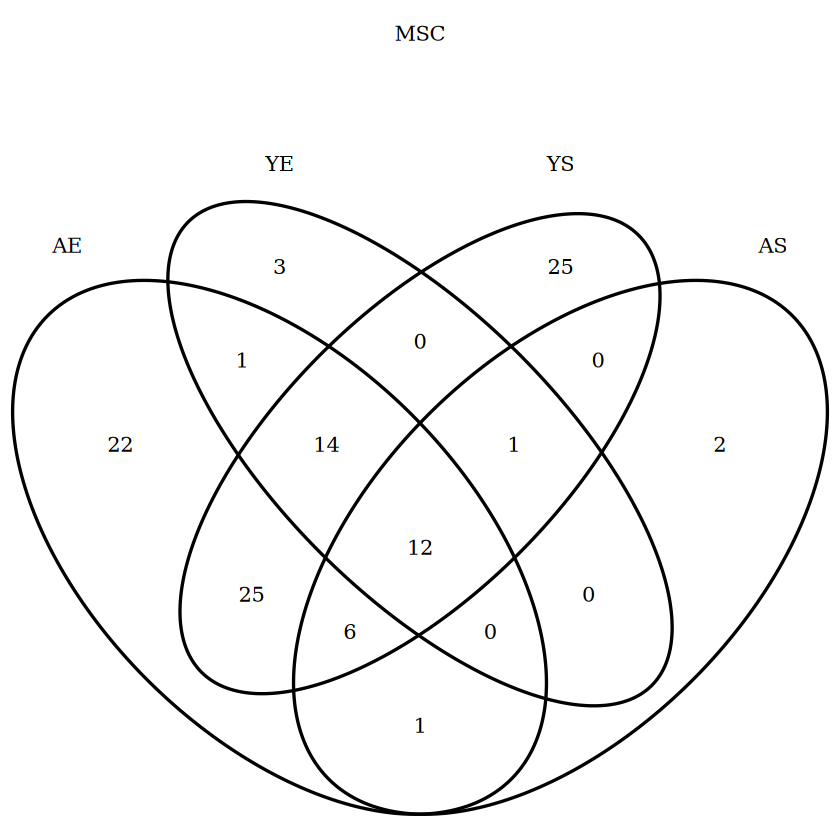

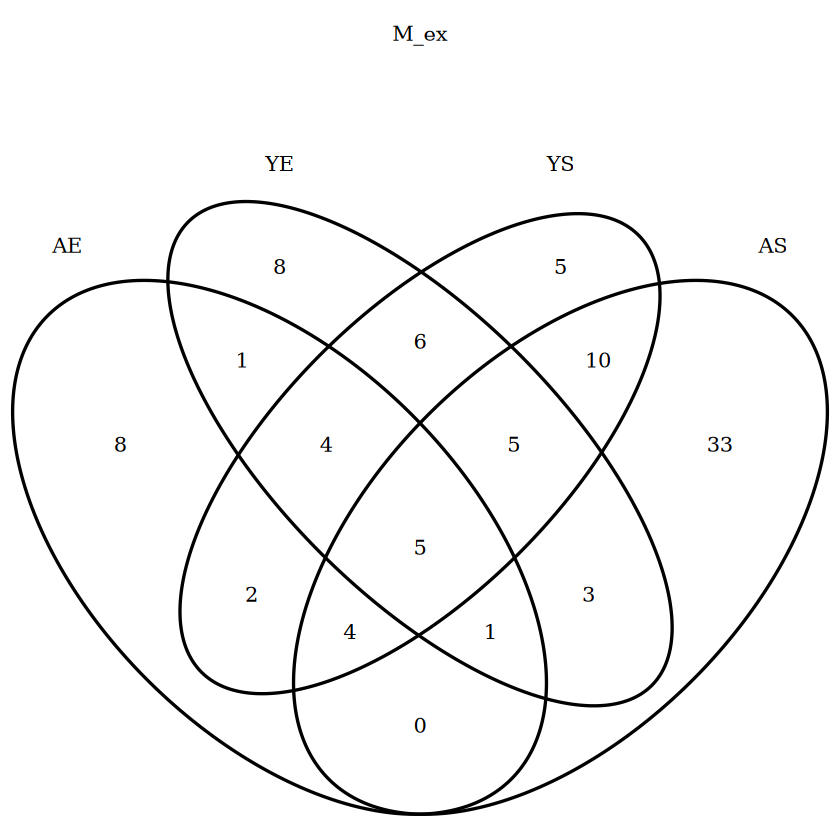

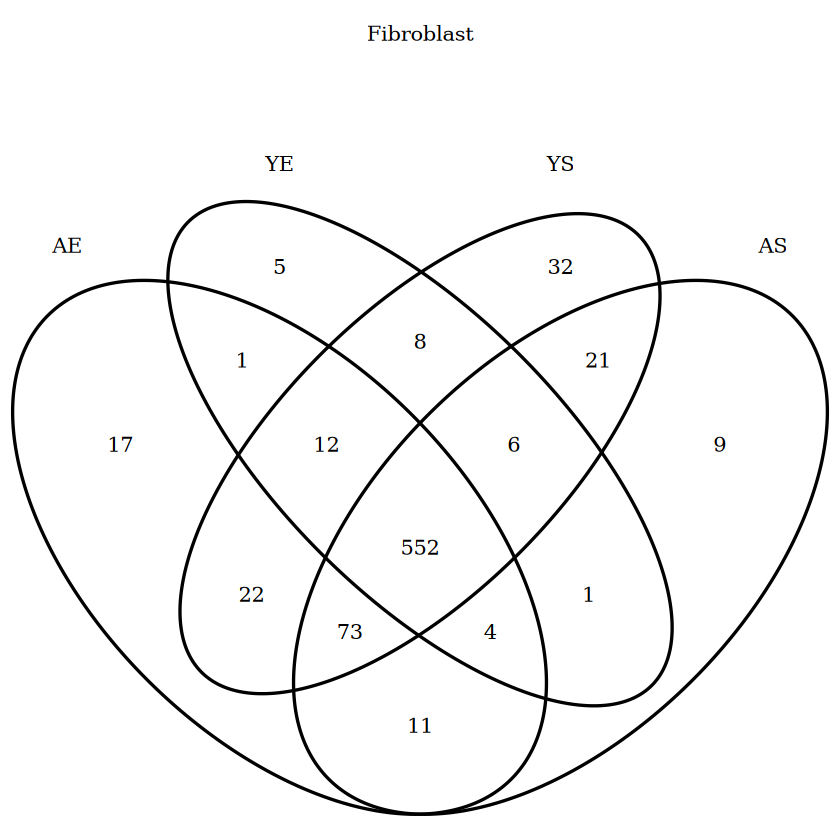

In [41]:
reps_sexmerge = list(c('MAE2_1','MAE4_3'),c('MAS1_4','MAS3_2'),c('YE2_1','YE4_3'),c('YS1_4','YS3_2'))

cells_sexmerge = c('M1','M2','MSC','M_ex','Fibroblast')

# groups_sexmerge = (c(cells_sexmerge[1], c(unlist(reps_sexmerge[1]))))
# for (cell in cells_sexmerge) {
#     for (rep in reps_sexmerge) {
#         group = c(cell, c(unlist(rep)))
#         groups_sexmerge = rbind(groups_sexmerge, group)
#         }
#     }
# groups_sexmerge = groups_sexmerge[2:nrow(groups_sexmerge), ]

for (cell in cells_sexmerge) {
    AE = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[1])[1], "_", unlist(reps_sexmerge[1])[2], ".gr.rds", sep = ""))
    AS = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[2])[1], "_", unlist(reps_sexmerge[2])[2], ".gr.rds", sep = ""))
    YE = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[3])[1], "_", unlist(reps_sexmerge[3])[2], ".gr.rds", sep = ""))
    YS = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[4])[1], "_", unlist(reps_sexmerge[4])[2], ".gr.rds", sep = ""))
    makeVennDiagram(list(AE, AS, YE, YS), NameOfPeaks = c("AE", "AS", "YE", "YS"), main = cell, method = "permutation", plot = TRUE)
    }
# makeVennDiagram(list(test1, test2), method = "permutation", plot = FALSE)


In [102]:
reps_sexmerge = list(c('MAE2_1','MAE4_3'),c('MAS1_4','MAS3_2'),c('YE2_1','YE4_3'),c('YS1_4','YS3_2'))

cells_sexmerge = c('M1','M2','MSC','M_ex','Fibroblast')
common_colnames = c('ReadSums_individual1_M', 'ReadSDs_individual1_M', 'MappingReadNumbers_individual1_M', 'ConstituentPeakCoords_individual1_M', 'NumberOfConstituentPeaks_individual1_M', 'ConstituentPeakIndices_individual1_M', 'CoeffVar_individual1_M', 'StitchedLength_individual1_M', 'ReadsPerbp_individual1_M', 'ReadSums_individual2_M', 'ReadSDs_individual2_M', 'MappingReadNumbers_individual2_M', 'ConstituentPeakCoords_individual2_M', 'NumberOfConstituentPeaks_individual2_M', 'ConstituentPeakIndices_individual2_M', 'CoeffVar_individual2_M', 'StitchedLength_individual2_M', 'ReadsPerbp_individual2_M', 'ReadSums_individual1_F', 'ReadSDs_individual1_F', 'MappingReadNumbers_individual1_F', 'ConstituentPeakCoords_individual1_F', 'NumberOfConstituentPeaks_individual1_F', 'ConstituentPeakIndices_individual1_F', 'CoeffVar_individual1_F', 'StitchedLength_individual1_F', 'ReadsPerbp_individual1_F', 'ReadSums_individual2_F', 'ReadSDs_individual2_F', 'MappingReadNumbers_individual2_F', 'ConstituentPeakCoords_individual2_F', 'NumberOfConstituentPeaks_individual2_F', 'ConstituentPeakIndices_individual2_F', 'CoeffVar_individual2_F', 'StitchedLength_individual2_F', 'ReadsPerbp_individual2_F')

for (cell in cells_sexmerge) {
    AE = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[1])[1], "_", unlist(reps_sexmerge[1])[2], ".gr.rds", sep = ""))
    colnames(mcols(AE)) = common_colnames
    mcols(AE)$Treatment = rep("AE", length(AE))
    AS = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[2])[1], "_", unlist(reps_sexmerge[2])[2], ".gr.rds", sep = ""))
    colnames(mcols(AS)) = common_colnames
    mcols(AS)$Treatment = rep("AS", length(AS))
    YE = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[3])[1], "_", unlist(reps_sexmerge[3])[2], ".gr.rds", sep = ""))
    colnames(mcols(YE)) = common_colnames
    mcols(YE)$Treatment = rep("YE", length(YE))
    YS = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[4])[1], "_", unlist(reps_sexmerge[4])[2], ".gr.rds", sep = ""))
    colnames(mcols(YS)) = common_colnames
    mcols(YS)$Treatment = rep("YS", length(YS))
    if (cell == "Fibroblast") {
        # print(length(AE))
        # print(length(AS))
        # print(length(YE))
        # print(length(YS))
        # merge = AE[as.data.frame(findOverlaps(AE, AS))[, 1], ]
        # merge = merge[as.data.frame(findOverlaps(merge, YE))[, 1], ]
        # merge = merge[as.data.frame(findOverlaps(merge, YS))[, 1], ]
        merge = AE[AE %in% AS & AE %in% YE & AE %in% YS, ]
        # mcols from all treatments into fibroblast intersection!!!
        } else {
        merge = rbind(rbind(rbind(as.data.frame(AE), as.data.frame(AS)), as.data.frame(YE)), as.data.frame(YS))
        mcols_merge = rbind(rbind(rbind(mcols(AE), mcols(AS)), mcols(YE)), mcols(YS))
        merge = makeGRangesFromDataFrame(merge)
        mcols(merge) = mcols_merge
        }
        merge = merge[!duplicated(merge), ]
    merge = sort(merge)
    saveRDS(merge, paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/TreatmentMerges/", cell, "_merge",".gr.rds", sep = ""))
    }


In [109]:
cells_sexmerge = c('M1','M2','MSC','M_ex','Fibroblast')

for (cell in cells_sexmerge) {
    bed = data.frame(seq = character(), start = numeric(), end = numeric(), name = character())
    gr = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/TreatmentMerges/", cell, "_merge",".gr.rds", sep = ""))
    gr = subset(x = gr, subset = gr$NumberOfConstituentPeaks_individual1_F >= 3 | gr$NumberOfConstituentPeaks_individual2_F >= 3 | gr$NumberOfConstituentPeaks_individual1_M >= 3 | gr$NumberOfConstituentPeaks_individual2_M >= 3)
    gr = reduce(gr)
    for (region in c(1:length(gr))) {
        bed = rbind(bed, cbind(as.character(seqnames(gr[region, ])), as.numeric(start(gr[region, ])), as.numeric(end(gr[region, ])), paste(as.character(seqnames(gr[region, ])), as.numeric(start(gr[region, ])), as.numeric(end(gr[region, ])), sep = "-")))
        write.table(bed, file=paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/TreatmentMerges/", cell, "_3orMoreConstituentPeaks",".bed", sep = ""), quote=FALSE, sep='\t', col.names = FALSE, row.names = FALSE)
        }
    }

In [104]:
fibr = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/TreatmentMerges/", "Fibroblast", "_merge",".gr.rds", sep = ""))
M1 = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/TreatmentMerges/", "M1", "_merge",".gr.rds", sep = ""))
M2 = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/TreatmentMerges/", "M2", "_merge",".gr.rds", sep = ""))
M_ex = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/TreatmentMerges/", "M_ex", "_merge",".gr.rds", sep = ""))

# makeVennDiagram(list(fibr, M1, M2), NameOfPeaks = c("Fibroblast", "M1", "M2"), method = "permutation", plot = TRUE)
# makeVennDiagram(list(fibr, M_ex), NameOfPeaks = c("Fibroblast", "M_ex"), method = "permutation", plot = TRUE)

# length(unique(as.data.frame(findOverlaps(fibr, M_ex))[, 2]))
# findOverlaps(fibr, M1)
# findOverlaps(fibr, M2)

# findOverlapsOfPeaks(fibr, M_ex)


In [107]:
table(M_ex$NumberOfConstituentPeaks_individual2_M)


 1  2  3  4  5 
54 35 11  5  2 

In [39]:
cell = "Fibroblast"
AE = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[1])[1], "_", unlist(reps_sexmerge[1])[2], ".gr.rds", sep = ""))
AS = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[2])[1], "_", unlist(reps_sexmerge[2])[2], ".gr.rds", sep = ""))
YE = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[3])[1], "_", unlist(reps_sexmerge[3])[2], ".gr.rds", sep = ""))
YS = readRDS(paste("/g/data/zk16/arthuss/superenhancer/FirstRun/CombinedSuperenhancerCandidates/SexIntersections/", cell, "_", unlist(reps_sexmerge[4])[1], "_", unlist(reps_sexmerge[4])[2], ".gr.rds", sep = ""))
table(duplicated(YS))
for (i in c(1:length(duplicated(YS)))) {
    if (duplicated(YS)[i]) {
        print(i)
        }
    }
YS[525:530, ]



FALSE  TRUE 
  727     1 

[1] 528


GRanges object with 6 ranges and 36 metadata columns:
      seqnames            ranges strand | ReadSums_YS1_4_M ReadSDs_YS1_4_M
         <Rle>         <IRanges>  <Rle> |        <numeric>       <numeric>
  [1]    chr13 43560723-43603768      * |              804        116.1872
  [2]    chr13 43806535-43848041      * |              795         49.9199
  [3]    chr13 44159217-44261768      * |             2693        242.0119
  [4]    chr13 44159217-44261768      * |             2693        242.0119
  [5]    chr13 44282425-44363320      * |             2449        234.7717
  [6]    chr13 48545355-48575119      * |             2387        455.9787
      MappingReadNumbers_YS1_4_M ConstituentPeakCoords_YS1_4_M
                     <character>                   <character>
  [1]      264 104 296 37 20 4..        ,chr13-43560723-4356..
  [2]      94 36 139 101 187 3..        ,chr13-43806535-4380..
  [3]      413 134 106 15 29 2..        ,chr13-44159217-4416..
  [4]      413 134 106 15 29 2.

In [21]:
AE

GRanges object with 696 ranges and 36 metadata columns:
        seqnames              ranges strand | ReadSums_MAE2_1_M
           <Rle>           <IRanges>  <Rle> |         <numeric>
    [1]     chr1   14772608-14801447      * |               771
    [2]     chr1   39063994-39107421      * |               937
    [3]     chr1   39731488-39773173      * |              1436
    [4]     chr1   40171679-40191266      * |               513
    [5]     chr1   45663443-45676232      * |               543
    ...      ...                 ...    ... .               ...
  [692]    chr19   55102921-55165039      * |              1086
  [693]    chr19   56156425-56204286      * |              1165
  [694]     chrX   73460943-73483005      * |               768
  [695]     chrX   99497304-99532615      * |               647
  [696]     chrX 140479039-140538925      * |              1580
        ReadSDs_MAE2_1_M MappingReadNumbers_MAE2_1_M
               <numeric>                 <character>
    [1